# Loan Status EDA

In [40]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [41]:
# Reading the file into Dataframe
df_clean = pd.read_csv('https://finalprojectanalysis-bucket.s3.us-east-2.amazonaws.com/clean_data.csv')
df_clean.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


# Studying each categorical column

C:\Users\19055\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='count'>

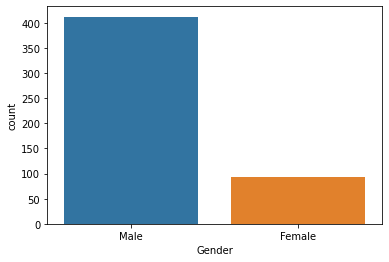

In [42]:
# checking the gender column proportion
sns.countplot(df_clean['Gender'])

there are more male than female in our dataset

C:\Users\19055\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Married', ylabel='count'>

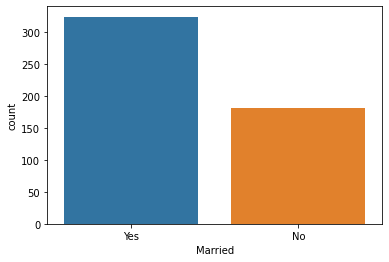

In [43]:
#check the marital status proportion
sns.countplot(df_clean['Married'])

there are more married applicants than the ones that are not married 

C:\Users\19055\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Education', ylabel='count'>

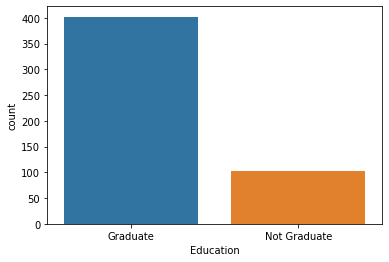

In [44]:
#check the education column proportion
sns.countplot(df_clean['Education'])

there seem to be more applicant that are married than the unmarried ones

C:\Users\19055\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

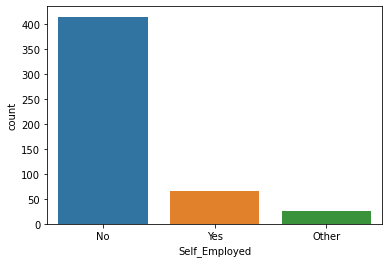

In [45]:
sns.countplot(df_clean['Self_Employed'])

most applicants are not self employed as opposed to the ones that are self employed. More that a 2/3 of the applicants were not self employed

C:\Users\19055\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Property_Area', ylabel='count'>

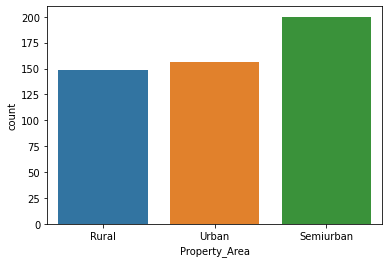

In [46]:
sns.countplot(df_clean['Property_Area'])

There seem to be more applicant from the semiurban region followed by the applicants from the urban area and finally from the rural area but there seem not to be difference in proportion

C:\Users\19055\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

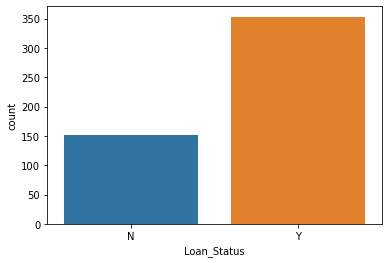

In [47]:
sns.countplot(df_clean['Loan_Status'])

Loan Approval Status: About 2/3rd of applicants have been approved for a loan.

# Loan status relation with other features

In [48]:
#creating a numerical columns for the numerical features in our dataset
numerical_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']
print(numerical_columns)

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']


In [49]:
#creating a categorical columns for the categorical features in our dataset
categorical_columns = ['Credit_History', 'Self_Employed', 'Education','Married','Gender','Property_Area','Dependents','Loan_Amount_Term']
print(numerical_columns)

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']


       ApplicantIncome  CoapplicantIncome  LoanAmount
count       505.000000         505.000000  505.000000
mean       5411.427723        1562.978059  144.566337
std        6127.874416        2564.980770   81.306177
min         150.000000           0.000000    9.000000
25%        2895.000000           0.000000  100.000000
50%        3833.000000        1126.000000  128.000000
75%        5818.000000        2253.000000  167.000000
max       81000.000000       33837.000000  600.000000


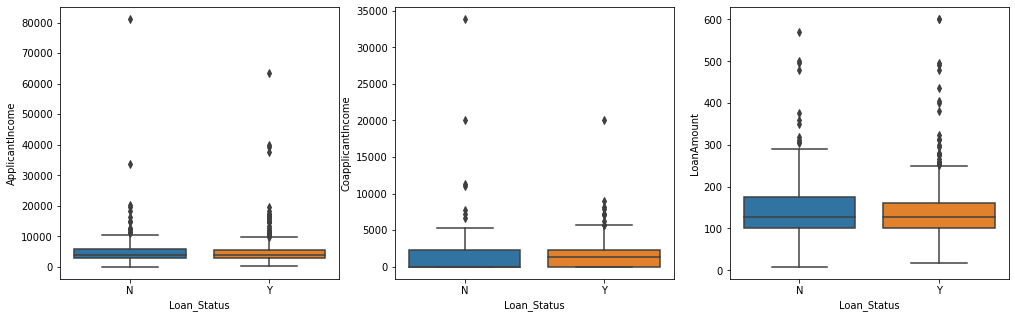

In [50]:
#box plot to visualize the relation between the numerical column and the target ouput (loan_status column)
fig,axes = plt.subplots(1,3,figsize=(17,5))
for idx,cat_col in enumerate(numerical_columns):
    sns.boxplot(y=cat_col,data=df_clean,x='Loan_Status',ax=axes[idx])
print(df_clean[numerical_columns].describe())
plt.subplots_adjust(hspace=1)


For Numercical Columns, there is no significant relation to Loan approval status.This will be better displayed in the correlation box as we continue this analysis

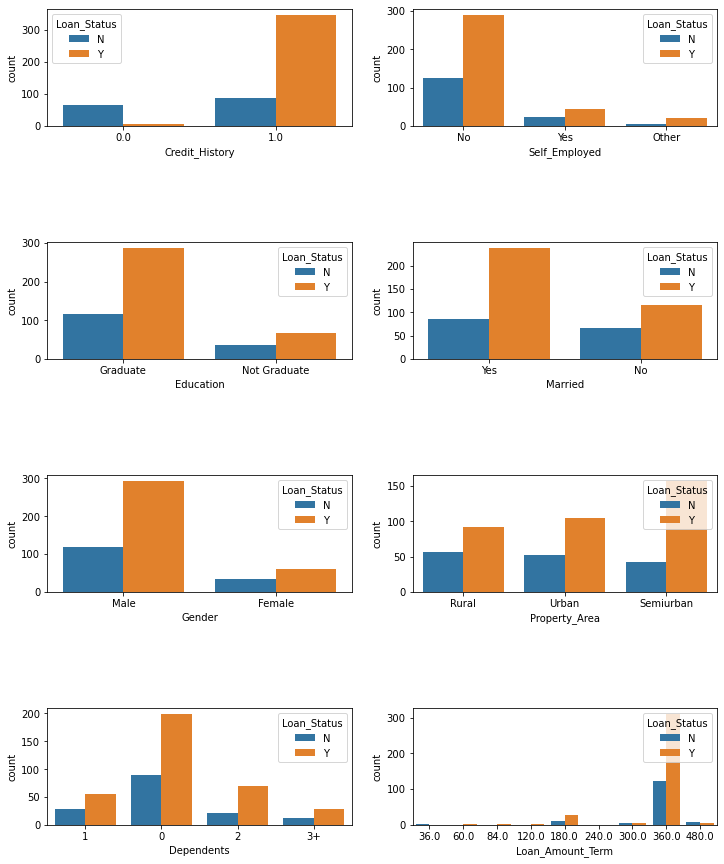

In [51]:
#graph to visualize the relation between the categorical column and the target ouput (loan_status column)
fig,axes = plt.subplots(4,2,figsize=(12,15))
for idx,cat_col in enumerate(categorical_columns):
    row,col = idx//2,idx%2
    sns.countplot(x=cat_col,data=df_clean,hue='Loan_Status',ax=axes[row,col])


plt.subplots_adjust(hspace=1)



- Gender : There are more Men than Women Maried: From this data set you can see than more married applicant were approved almost 3 times more people were approved 
- Dependents: Majority of the population have zero dependents and will be higly be accepted for a loan 
- Education: Almost everybody in our data set have graduated and they are most likely to be granted a loan 
- Employment: Most of the applicants are not self employed and according to our graph will most likely be granted a loan . - Property Area: More applicants from Semi-urban and also likely to be granted loans. 
- Applicant with credit history are far more likely to be accepted. Loan Amount Term: Majority of the loans taken are for 360 Months (30 years)